# Proyecto final: EDA en Python
En este archivo se desarrolla una parte del proyecto final, la correspondiente a la limpieza y el análisis de datos mediante programación en python generando un EDA que será complementado posteriormente con un Dashboard interactivo y un informe correspondiente sobre el estudio.

Comienzo importando las librerías necesarias para comenzar con el EDA

In [1]:
import numpy as np

In [2]:
import pandas as pd 

## Importación de datos

Comienzo por importar los datos de los diferentes archivos para realizar una primera inspección preliminal de las filas y columnas, así como de las posibles formas de unión de los diferentes datasets en uno sólo. 

In [3]:

# Cargo el archivo CSV en un DataFrame
df_muertes = pd.read_csv( 'Datos brutos/estimated-cumulative-excess-deaths-per-100000-people-during-covid-19 (1).csv', #Señalo la ruta del archivo
        sep = ',', #Identifico el separador
        header = 0, # Fila de encabezado
        index_col = None) #No habrá índice del Dataframe

# Muestro el DataFrame
df_muertes 

,Entity,Day,"Cumulative excess deaths per 100,000 people (central estimate)","Cumulative excess deaths per 100,000 people (95% CI, lower bound)","Cumulative excess deaths per 100,000 people (95% CI, upper bound)","Total confirmed deaths due to COVID-19 per 100,000 people"
0,Afghanistan,2020-01-01,-0.022148,-0.289158,0.420465,NaN
1,Afghanistan,2020-01-06,-0.044295,-0.570486,0.848026,0.000000
2,Afghanistan,2020-01-13,-0.047579,-0.837293,1.281982,0.000000
3,Afghanistan,2020-01-20,0.022123,-1.125014,1.698806,0.000000
4,Afghanistan,2020-01-27,0.063374,-1.377656,2.177791,0.000000
...,...,...,...,...,...,...
523052,Zimbabwe,2025-09-24,NaN,NaN,NaN,35.720818
523053,Zimbabwe,2025-09-25,NaN,NaN,NaN,35.720818
523054,Zimbabwe,2025-09-26,NaN,NaN,NaN,35.720818
523055,Zimbabwe,2025-09-27,NaN,NaN,NaN,35.720818


In [4]:

# Cargo el segundo archivo CSV en un DataFrame
df_felicidad = pd.read_csv( 'Datos brutos/world-happiness-report-2021.csv', #Señalo la ruta del archivo
        sep = ',', #Identifico el separador
        header = 0, # Fila de encabezado
        index_col = None) #No habrá índice del Dataframe

# Muestro el DataFrame
df_felicidad 

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
145,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205


### Unión de conjuntos de datos

Para no trabajar con dos conjuntos de datos aislados, uno en un mismo dataset los dos ya importados.

Para ello son muy importantes las columnas referentes a los países, mediante las que uniré los datos. Mi dataset princiapl es df_muertes al contar con tanas filas, así que a ese añadiré los datos del otro dataframe. Lo hago usando una unión de tipo left (izquierda): mantengo todas las filas de df_muertes y, donde el nombre del país coincida, añade la información de df_felicidad. 

Si un país del dataset de muertes no se encuentra en el de felicidad, las nuevas columnas aparecerán con valores nulos (NaN), lo cual es perfecto para identificar y tratar esos casos más adelante.

In [5]:
# 1. Renombro la columna 'Entity' en el df_muertes para que coincida
df_muertes.rename(columns={'Entity': 'Country name'}, inplace=True)

# 2. Uno los dos DataFrames con un merge de tipo 'left'
df_final = pd.merge(df_muertes, df_felicidad, on='Country name', how='left')

# 3. Verifico el resultado
print("El nuevo dataset tiene la siguiente forma:")
print(df_final.shape)

df_final.head()  # Muestro las primeras filas del nuevo DataFrame

El nuevo dataset tiene la siguiente forma:
(523057, 25)


,Country name,Day,"Cumulative excess deaths per 100,000 people (central estimate)","Cumulative excess deaths per 100,000 people (95% CI, lower bound)","Cumulative excess deaths per 100,000 people (95% CI, upper bound)","Total confirmed deaths due to COVID-19 per 100,000 people",Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,...,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Afghanistan,2020-01-01,-0.022148,-0.289158,0.420465,NaN,South Asia,2.523,0.038,2.596,...,-0.102,0.924,2.43,0.37,0.0,0.126,0.0,0.122,0.01,1.895
1,Afghanistan,2020-01-06,-0.044295,-0.570486,0.848026,0.0,South Asia,2.523,0.038,2.596,...,-0.102,0.924,2.43,0.37,0.0,0.126,0.0,0.122,0.01,1.895
2,Afghanistan,2020-01-13,-0.047579,-0.837293,1.281982,0.0,South Asia,2.523,0.038,2.596,...,-0.102,0.924,2.43,0.37,0.0,0.126,0.0,0.122,0.01,1.895
3,Afghanistan,2020-01-20,0.022123,-1.125014,1.698806,0.0,South Asia,2.523,0.038,2.596,...,-0.102,0.924,2.43,0.37,0.0,0.126,0.0,0.122,0.01,1.895
4,Afghanistan,2020-01-27,0.063374,-1.377656,2.177791,0.0,South Asia,2.523,0.038,2.596,...,-0.102,0.924,2.43,0.37,0.0,0.126,0.0,0.122,0.01,1.895


Al realizar esta unión se pierden dato de algunos países de df_felicidad que no encajan con los del df_muertes, así que realizo una unión más precisa con los siguientes pasos:

**Normalización de las Claves de Unión:** Estandarizo la columna con los nombres de los países en ambos DataFrames. Para ello, se elimino los espacios en blanco sobrantes y se convierto todos los nombres a minúsculas. Esto garantiza que las diferencias de formato (ej: "Finland" vs " finland ") no impidan que los datos se unan correctamente.

**Filtrado con Lista Maestra:** SUso la lista de países del informe de felicidad como una lista maestra. Filtro el conjunto de datos de muertes para conservar únicamente las filas que correspondan a los países presentes en esta lista limpia.

**Unión Definitiva:** Realizo un merge de tipo left con los datos ya normalizados y filtrados.

In [6]:
# Vuelvo a cargar los datos originales para asegurar que empezamos el proceso desde cero
df_muertes_raw = pd.read_csv('Datos brutos/estimated-cumulative-excess-deaths-per-100000-people-during-covid-19 (1).csv')
df_felicidad_raw = pd.read_csv('Datos brutos/world-happiness-report-2021.csv')

# Normalizo la columna 'Entity' en el df de muertes (quito espacios y a minúsculas)
df_muertes_raw['Entity'] = df_muertes_raw['Entity'].str.strip().str.lower()

# Normalizo la columna 'Country name' en el df de felicidad
df_felicidad_raw['Country name'] = df_felicidad_raw['Country name'].str.strip().str.lower()

# Renombro 'Entity' para que la columna de unión se llame igual en ambos dataframes
df_muertes_raw.rename(columns={'Entity': 'Country name'}, inplace=True)

# Obtengo la lista maestra limpia de países desde el dataframe de felicidad
lista_paises_validos = df_felicidad_raw['Country name'].unique()

# Filtro el dataframe de muertes para quedarme solo con las filas cuyo país está en la lista válida
print(f"Filas en el df de muertes antes del filtrado: {len(df_muertes_raw)}")
df_muertes_filtrado = df_muertes_raw[df_muertes_raw['Country name'].isin(lista_paises_validos)]
print(f"Filas en el df de muertes después del filtrado: {len(df_muertes_filtrado)}")

# Uno los dataframes ya limpios y filtrados.
# Uso 'left' para mantener todas las filas del df de muertes ya filtrado.
df_final_limpio = pd.merge(df_muertes_filtrado, df_felicidad_raw, on='Country name', how='left')

# Verificación

print(f"Forma del DataFrame final y limpio: {df_final_limpio.shape}")
print(f"Verificación de valores nulos en la columna 'Ladder score':")
print(df_final_limpio['Ladder score'].isnull().sum())

df_final_limpio.head()


Filas en el df de muertes antes del filtrado: 523057
Filas en el df de muertes después del filtrado: 295536
Forma del DataFrame final y limpio: (295536, 25)
Verificación de valores nulos en la columna 'Ladder score':
0


,Country name,Day,"Cumulative excess deaths per 100,000 people (central estimate)","Cumulative excess deaths per 100,000 people (95% CI, lower bound)","Cumulative excess deaths per 100,000 people (95% CI, upper bound)","Total confirmed deaths due to COVID-19 per 100,000 people",Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,...,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,afghanistan,2020-01-01,-0.022148,-0.289158,0.420465,NaN,South Asia,2.523,0.038,2.596,...,-0.102,0.924,2.43,0.37,0.0,0.126,0.0,0.122,0.01,1.895
1,afghanistan,2020-01-06,-0.044295,-0.570486,0.848026,0.0,South Asia,2.523,0.038,2.596,...,-0.102,0.924,2.43,0.37,0.0,0.126,0.0,0.122,0.01,1.895
2,afghanistan,2020-01-13,-0.047579,-0.837293,1.281982,0.0,South Asia,2.523,0.038,2.596,...,-0.102,0.924,2.43,0.37,0.0,0.126,0.0,0.122,0.01,1.895
3,afghanistan,2020-01-20,0.022123,-1.125014,1.698806,0.0,South Asia,2.523,0.038,2.596,...,-0.102,0.924,2.43,0.37,0.0,0.126,0.0,0.122,0.01,1.895
4,afghanistan,2020-01-27,0.063374,-1.377656,2.177791,0.0,South Asia,2.523,0.038,2.596,...,-0.102,0.924,2.43,0.37,0.0,0.126,0.0,0.122,0.01,1.895


## Limpieza y trasnformación de los datos 

Ahora que tengo mi conjunto de datos df_final_limpio unificado, el primer paso es realizar una inspección general para entender su estructura interna.

Uso .info(), que me proporciona un resumen técnico de cada una de las 25 columnas, y asi inspecciono los valores nulos y los tipos de valores que pueden ser incorrectos. 

In [7]:
df_final_limpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295536 entries, 0 to 295535
Data columns (total 25 columns):
 #   Column                                                             Non-Null Count   Dtype  
---  ------                                                             --------------   -----  
 0   Country name                                                       295536 non-null  object 
 1   Day                                                                295536 non-null  object 
 2   Cumulative excess deaths per 100,000 people (central estimate)     32994 non-null   float64
 3   Cumulative excess deaths per 100,000 people (95% CI, lower bound)  32994 non-null   float64
 4   Cumulative excess deaths per 100,000 people (95% CI, upper bound)  32994 non-null   float64
 5   Total confirmed deaths due to COVID-19 per 100,000 people          295395 non-null  float64
 6   Regional indicator                                                 295536 non-null  object 
 7   Ladder scor

### Tipo de datos 

La columna Day es de tipo object (es decir, texto), cuando en realidad representa una fecha. Para poder realizar análisis de series temporales, filtrar por rangos de fechas o crear visualizaciones cronológicas, necesito convertir esta columna a un formato específico de fecha (datetime).

In [8]:
# Convierto la columna 'Day' a formato datetime para poder trabajar con fechas
df_final_limpio['Day'] = pd.to_datetime(df_final_limpio['Day'])

# Verifico que el tipo de dato (Dtype) ha cambiado correctamente
print("Tipo de dato de la columna 'Day' después de la conversión:")
print(df_final_limpio[['Day']].info())


Tipo de dato de la columna 'Day' después de la conversión:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295536 entries, 0 to 295535
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   Day     295536 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 2.3 MB
None


### Análisis de Valores Nulos

Voy a calcular la suma total de valores nulos para cada columna y, lo que es más importante, el porcentaje que representan sobre el total de filas. Esto me dará una visión clara de la magnitud del problema y me ayudará a definir una estrategia para cada columna afectada:

*   Si el porcentaje de nulos es muy alto, podría considerar eliminar la columna.
*   Si es muy bajo, podría optar por eliminar las filas correspondientes.
*   Si es intermedio, podría estudiar la posibilidad de rellenar (imputar) esos valores con la media, la mediana, o algún otro método estadístico.


In [9]:
# Calculo el número total de valores nulos por columna
nulos_por_columna = df_final_limpio.isnull().sum()

# Filtro para quedarme solo con aquellas columnas que tienen al menos un valor nulo
columnas_con_nulos = nulos_por_columna[nulos_por_columna > 0]

# Calculo el porcentaje que estos nulos representan sobre el total de filas
porcentaje_nulos = (columnas_con_nulos / len(df_final_limpio)) * 100

# Creo un nuevo DataFrame para mostrar los resultados de forma ordenada y clara
resumen_nulos = pd.DataFrame({
    'Total de Nulos': columnas_con_nulos,
    'Porcentaje (%)': porcentaje_nulos
}).sort_values(by='Total de Nulos', ascending=False)

print("Resumen de columnas que contienen valores nulos:")
print(resumen_nulos)

Resumen de columnas que contienen valores nulos:
                                                    Total de Nulos  \
Cumulative excess deaths per 100,000 people (ce...          262542   
Cumulative excess deaths per 100,000 people (95...          262542   
Cumulative excess deaths per 100,000 people (95...          262542   
Total confirmed deaths due to COVID-19 per 100,...             141   

                                                    Porcentaje (%)  
Cumulative excess deaths per 100,000 people (ce...       88.835878  
Cumulative excess deaths per 100,000 people (95...       88.835878  
Cumulative excess deaths per 100,000 people (95...       88.835878  
Total confirmed deaths due to COVID-19 per 100,...        0.047710  


**Columnas de Felicidad:** Para las columnas del informe de felicidad que tengan un porcentaje bajo de nulos, no quiero perder las filas enteras. En su lugar, voy a rellenar (imputar) los valores faltantes con la **mediana** de la columna. Elijo la mediana en lugar de la media porque es más robusta y no se ve tan afectada por posibles valores extremos (outliers).

**Columna "Total confirmed deaths...":** Observando la naturaleza de los datos, es muy probable que los nulos en esta columna se encuentren al principio del periodo, antes de que se confirmara la primera muerte. Por lo tanto, lo más lógico es rellenar estos nulos con el valor 0.

**Columnas "Cumulative excess deaths...":** Estas columnas son el corazón del análisis. Si falta el dato principal de muertes en exceso, la fila pierde gran parte de su valor analítico. Dado que no puedo inventar este dato, decido **eliminar las filas** donde falte este valor.


In [10]:
# Pongo la mediana en las columnas de felicidad que tengan nulos
columnas_felicidad_con_nulos = ['Logged GDP per capita', 'Social support', 'Healthy life expectancy', 
                                'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

for columnita in columnas_felicidad_con_nulos:
    # Compruebo si la columna realmente tiene nulos antes de hacer nada
    if df_final_limpio[columnita].isnull().any():
        mediana = df_final_limpio[columnita].median()
        df_final_limpio[columnita].fillna(mediana, inplace=True)
        print(f"Nulos en '{columnita}' rellenados con la mediana ({mediana:.2f}).")

# Relleno con 0 los nulos de la columna de muertes confirmadas
if df_final_limpio['Total confirmed deaths due to COVID-19 per 100,000 people'].isnull().any():
    df_final_limpio['Total confirmed deaths due to COVID-19 per 100,000 people'].fillna(0, inplace=True)

# Elimino las filas donde falten los datos de muertes en exceso
print(f"\nFilas antes de eliminar nulos de 'Cumulative excess deaths': {len(df_final_limpio)}")
df_final_limpio.dropna(subset=['Cumulative excess deaths per 100,000 people (central estimate)'], inplace=True)
print(f"Filas después de eliminar nulos: {len(df_final_limpio)}")


# Verificación 
print("\n--- Verificación Final de Nulos ---")
nulos_restantes = df_final_limpio.isnull().sum()
print("Columnas que todavía tienen nulos (si las hay):")
print(nulos_restantes[nulos_restantes > 0])

if nulos_restantes.sum() == 0:
    print("\n¡Perfecto! No quedan valores nulos en el DataFrame.")



Filas antes de eliminar nulos de 'Cumulative excess deaths': 295536
Filas después de eliminar nulos: 32994

--- Verificación Final de Nulos ---
Columnas que todavía tienen nulos (si las hay):
Series([], dtype: int64)

¡Perfecto! No quedan valores nulos en el DataFrame.


C:\Users\Usuario\AppData\Local\Temp\ipykernel_59980\479701276.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_final_limpio['Total confirmed deaths due to COVID-19 per 100,000 people'].fillna(0, inplace=True)


### Verificación y Eliminación de Duplicados
Me quiero asegurar de que no tengo filas completamente idénticas (duplicadas). Las filas duplicadas no aportan información nueva y pueden introducir sesgos en los resultados de los análisis.

In [11]:
# Cuento cuántas filas duplicadas existen en el DataFrame
num_duplicados = df_final_limpio.duplicated().sum()
print(f"Número de filas duplicadas encontradas: {num_duplicados}")

# Si se encuentran duplicados, los elimino
if num_duplicados > 0:
    df_final_limpio.drop_duplicates(inplace=True)
    print("Filas duplicadas eliminadas.")
    print(f"Nueva forma del DataFrame: {df_final_limpio.shape}")
else:
    print("No se encontraron filas duplicadas. El DataFrame está limpio en este aspecto.")



Número de filas duplicadas encontradas: 0
No se encontraron filas duplicadas. El DataFrame está limpio en este aspecto.


### Análisis Descriptivo 
Ahora que mi DataFrame está limpio estructuralmente, voy a realizar una última comprobación de los valores que contiene. Uso el método .describe(). Este comando genera un resumen de estadísticas descriptivas (como la media, desviación estándar, mínimo, máximo y los percentiles) para todas las columnas numéricas.

In [12]:
# Genero estadísticas descriptivas para todas las columnas numéricas.
# Uso .T para transponer el resultado, lo que facilita la lectura cuando hay muchas columnas.
resumen_estadistico = df_final_limpio.describe().T
resumen_estadistico


,count,mean,min,25%,50%,75%,max,std
Day,32994,2022-03-24 12:12:18.461538560,2020-01-01 00:00:00,2021-02-08 00:00:00,2022-03-24 12:00:00,2023-05-08 00:00:00,2024-06-17 00:00:00,NaN
"Cumulative excess deaths per 100,000 people (central estimate)",32994.0,199.063684,-71.16963,43.917828,155.20894,287.80908,1096.093,198.905202
"Cumulative excess deaths per 100,000 people (95% CI, lower bound)",32994.0,154.098437,-71.16963,0.0,94.52435,227.039925,1094.4181,202.713322
"Cumulative excess deaths per 100,000 people (95% CI, upper bound)",32994.0,258.377938,-71.16963,64.899822,225.187805,390.390753,1283.3141,224.964992
"Total confirmed deaths due to COVID-19 per 100,000 people",32994.0,93.463968,0.0,3.220264,32.101079,142.09245,660.1169,126.648584
Ladder score,32994.0,5.534454,2.523,4.852,5.545,6.255,7.842,1.081487
Standard error of ladder score,32994.0,0.058539,0.026,0.043,0.054,0.07,0.173,0.022106
upperwhisker,32994.0,5.64917,2.596,4.991,5.685,6.344,7.904,1.061944
lowerwhisker,32994.0,5.419709,2.449,4.706,5.442,6.128,7.78,1.102386
Logged GDP per capita,32994.0,9.419702,6.635,8.541,9.569,10.369,11.647,1.154746


In [13]:
# A partir de ahora necesitaré visualizar los datos y para ello las librerías necesarias
!pip install matplotlib seaborn


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\Usuario\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [14]:
# Importo librerías de visualización
import matplotlib.pyplot as plt
import seaborn as sns

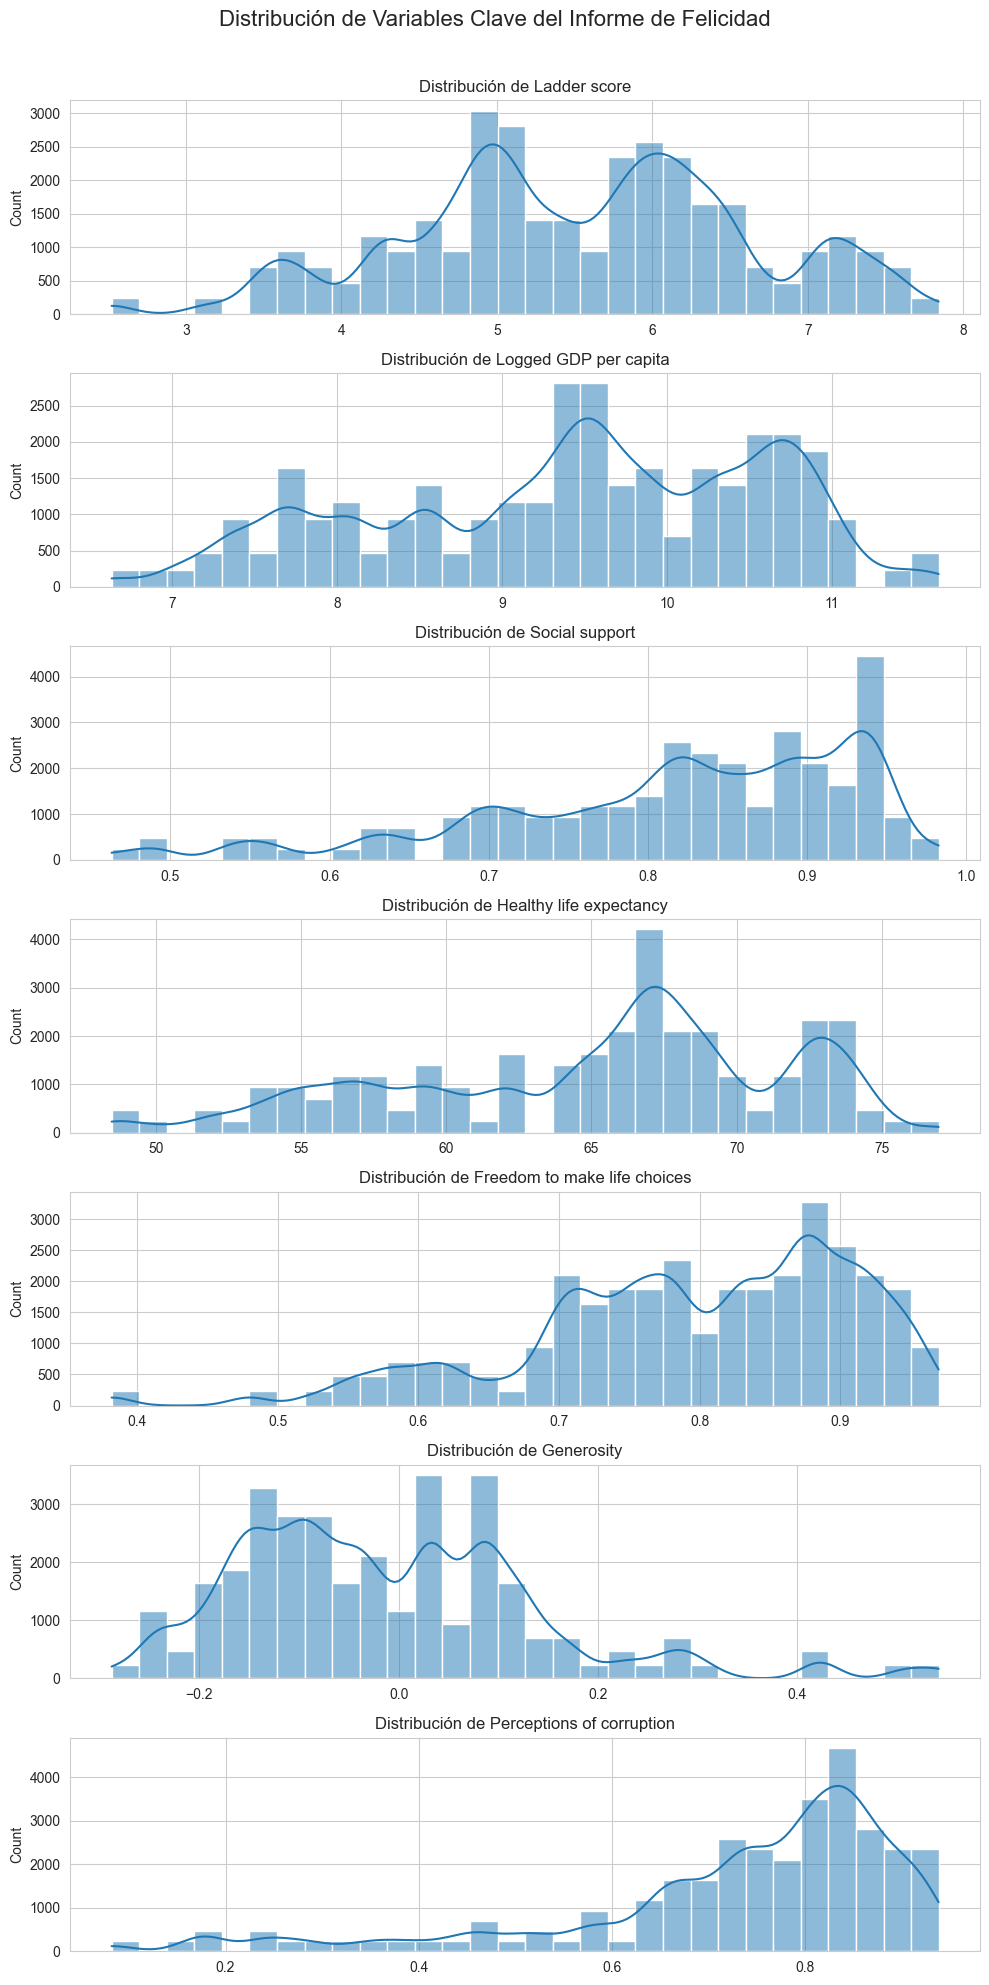

In [15]:
# Configuro el estilo de los gráficos para que se vean mejor
sns.set_style("whitegrid")

# Selecciono un subconjunto de columnas numéricas interesantes para visualizar
columnas_a_visualizar = ['Ladder score', 'Logged GDP per capita', 'Social support', 
                         'Healthy life expectancy', 'Freedom to make life choices', 
                         'Generosity', 'Perceptions of corruption']

# Creo una figura con varios subplots (uno para cada columna)
fig, axes = plt.subplots(nrows=len(columnas_a_visualizar), ncols=1, figsize=(10, 20))
fig.suptitle('Distribución de Variables Clave del Informe de Felicidad', fontsize=16, y=0.99)

for i, col in enumerate(columnas_a_visualizar):
    # Uso un histograma con una curva de densidad (KDE) para ver la forma de la distribución
    sns.histplot(df_final_limpio[col].dropna(), kde=True, ax=axes[i], bins=30)
    axes[i].set_title(f'Distribución de {col}', fontsize=12)
    axes[i].set_xlabel('') # Limpio el eje x para no sobrecargar

# Ajusto el layout para que no se solapen los títulos
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()


### Evolución Temporal de las Muertes en Exceso:

Ahora que la columna `Day` está en el formato correcto, voy a analizar cómo han evolucionado las muertes en exceso a lo largo del tiempo a nivel global.

Mi objetivo es visualizar las "olas" de la pandemia de una forma agregada. Para ello, agrupo todos los datos por día y calculo la media de la estimación central de muertes en exceso, junto con su intervalo de confianza. Esto me dará un gráfico de serie temporal que mostrará los picos de mortalidad a nivel mundial.


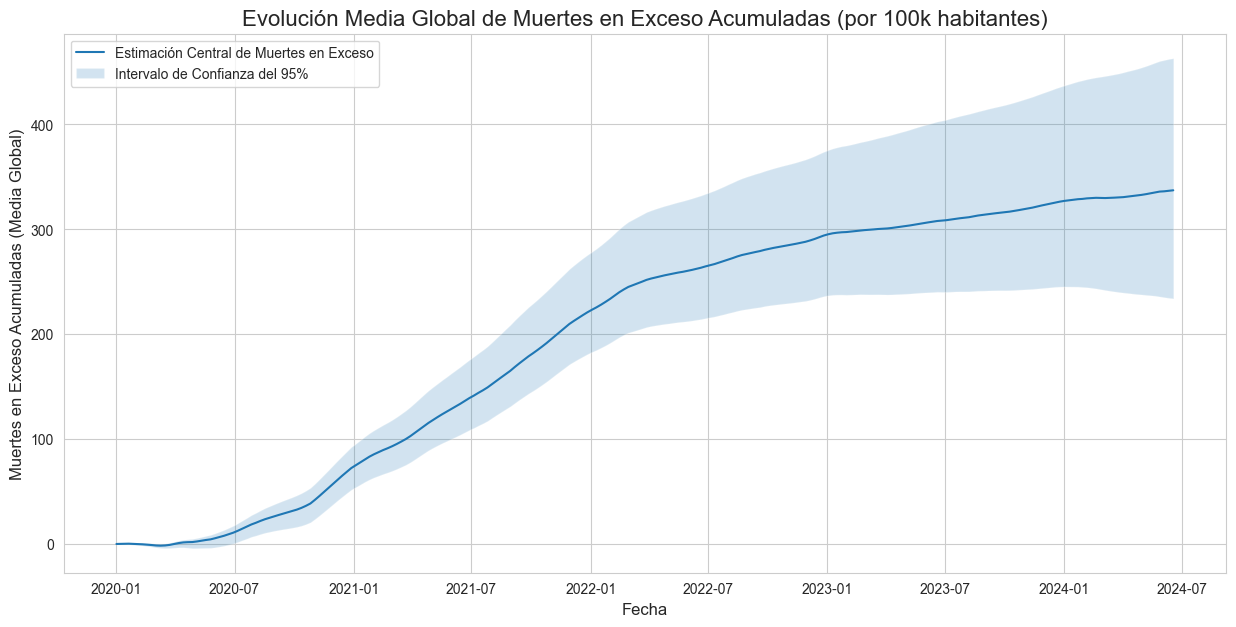

In [16]:
# Agrupo los datos por día y calculo la media de las muertes en exceso y sus intervalos de confianza
evolucion_temporal = df_final_limpio.groupby('Day').agg({
    'Cumulative excess deaths per 100,000 people (central estimate)': 'mean',
    'Cumulative excess deaths per 100,000 people (95% CI, lower bound)': 'mean',
    'Cumulative excess deaths per 100,000 people (95% CI, upper bound)': 'mean'
}).reset_index()

# Creo la visualización
plt.figure(figsize=(15, 7))

# Dibujo la línea de la estimación central
sns.lineplot(x='Day', y='Cumulative excess deaths per 100,000 people (central estimate)', data=evolucion_temporal, label='Estimación Central de Muertes en Exceso')

# Añado el intervalo de confianza como un área sombreada, lo que da una idea de la incertidumbre
plt.fill_between(
    evolucion_temporal['Day'],
    evolucion_temporal['Cumulative excess deaths per 100,000 people (95% CI, lower bound)'],
    evolucion_temporal['Cumulative excess deaths per 100,000 people (95% CI, upper bound)'],
    alpha=0.2,
    label='Intervalo de Confianza del 95%'
)

# Añado títulos y etiquetas para que el gráfico sea comprensible
plt.title('Evolución Media Global de Muertes en Exceso Acumuladas (por 100k habitantes)', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Muertes en Exceso Acumuladas (Media Global)', fontsize=12)
plt.legend()
plt.show()


### Comparativa de Impacto por Región Geográfica
Quiero comparar el efecto de la pandemia entre las diferentes regiones del mundo. Esto me permitirá identificar qué zonas geográficas, en promedio, han sufrido un mayor impacto en términos de muertes en exceso.

Para que la visualización sea clara y efectiva, OrdenO las barraS de mayor a menor impacto para facilitar la lectura rápida Y anoto el valor numérico directamente en cada barra para no tener que estimarlo a partir del eje.
Además, para mejorar la estructura del código, crearé una función reutilizable para este tipo de gráfico.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_59980\457794348.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


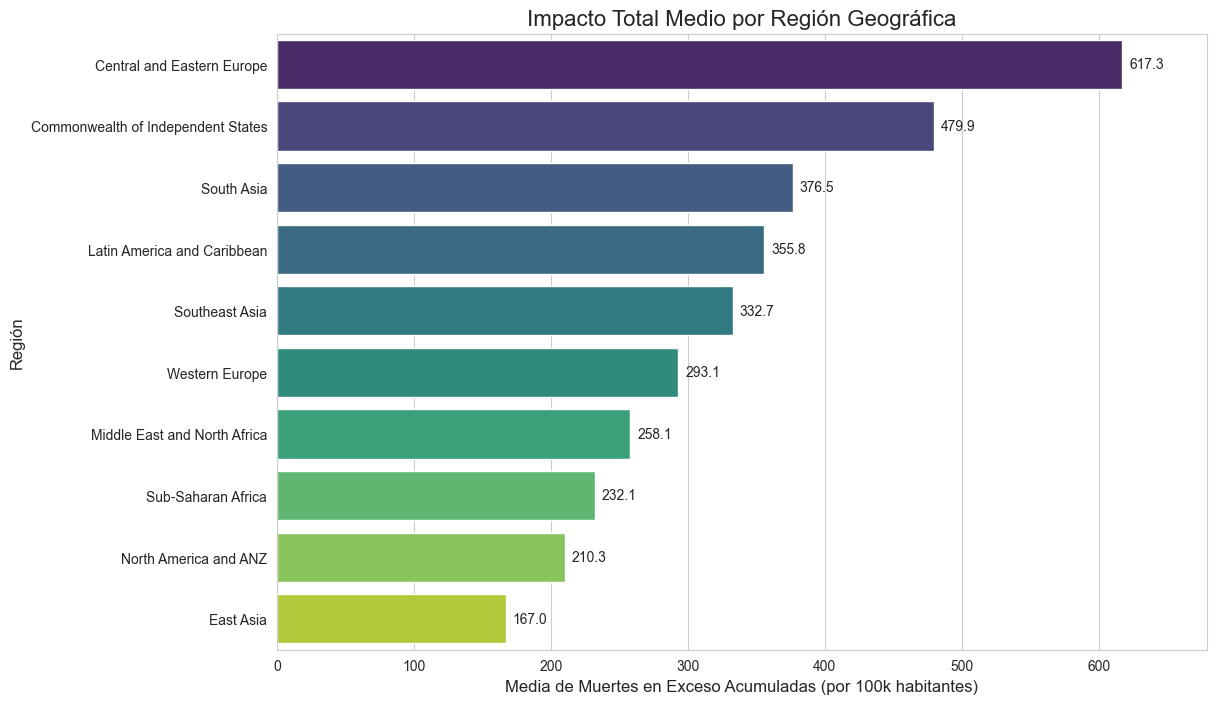

In [17]:
# Agrupo por región y calculo la media de muertes en exceso para el último día disponible para cada país
# Esto me da una mejor foto del impacto total al final del periodo.
impacto_por_region = df_final_limpio.loc[df_final_limpio.groupby('Country name')['Day'].idxmax()].groupby('Regional indicator').agg({
    'Cumulative excess deaths per 100,000 people (central estimate)': 'mean'
})

# Ordeno los resultados de mayor a menor para una mejor visualización
impacto_por_region_ordenado = impacto_por_region.sort_values(by='Cumulative excess deaths per 100,000 people (central estimate)', ascending=False)


# visualización 
plt.figure(figsize=(12, 8))

# Creo el gráfico de barras
barplot = sns.barplot(
    x=impacto_por_region_ordenado['Cumulative excess deaths per 100,000 people (central estimate)'],
    y=impacto_por_region_ordenado.index,
    palette='viridis'
)

# Añado las anotaciones numéricas en cada barra 
for p in barplot.patches:
    width = p.get_width()
    plt.text(
        width + 5, # Posición X 
        p.get_y() + p.get_height() / 2, # Posición Y 
        f'{width:.1f}', # El texto a mostrar (formateado a 1 decimal)
        va='center'
    )

# Configuro títulos y etiquetas
plt.title('Impacto Total Medio por Región Geográfica', fontsize=16)
plt.xlabel('Media de Muertes en Exceso Acumuladas (por 100k habitantes)', fontsize=12)
plt.ylabel('Región', fontsize=12)
plt.xlim(0, impacto_por_region_ordenado.max().values[0] * 1.1) # Ajusto el límite para que quepan las etiquetas
plt.show()


### Matriz de Correlación para Identificar Relaciones Clave

Ahora que he analizado las tendencias generales, quiero profundizar en las relaciones entre las distintas variables. Mi hipótesis principal es que ciertos indicadores socioeconómicos y de felicidad (como el PIB, el soporte social o la percepción de la corrupción) pueden estar correlacionados con el nivel de muertes en exceso que ha sufrido un país.

Para investigar esto de una manera eficiente, voy a calcular una matriz de correlación. Esta matriz mide la relación lineal entre cada par de variables numéricas, dándoles una puntuación de -1 (correlación negativa perfecta) a +1 (correlación positiva perfecta).

Para visualizarla, usaré un mapa de calor (heatmap), una técnica recomendada en la retroalimentación. Esto me permitirá identificar rápidamente, con colores, qué variables están más fuertemente relacionadas entre sí y con nuestro indicador principal de muertes en exceso. Para que la correlación sea significativa, la calcularé sobre un "resumen" del dataset que contenga un único valor final por país.


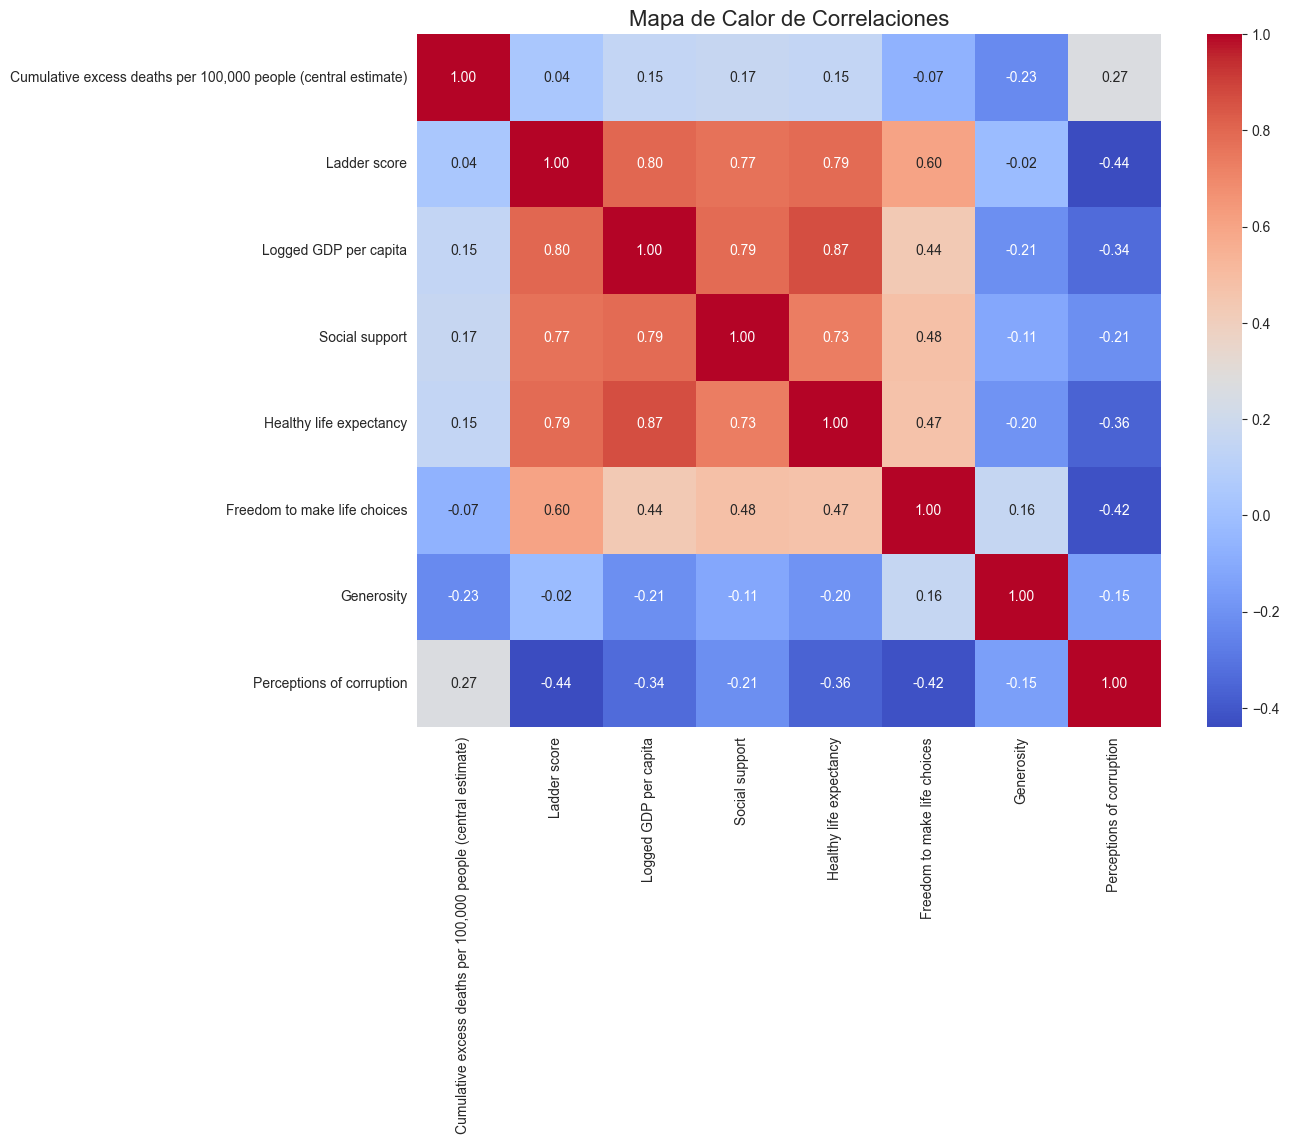

In [18]:
# Para hacer una correlación con sentido, necesito un único valor por país.
# Usao el mismo enfoque que en el gráfico de barras: el último dato disponible para cada país.
df_snapshot = df_final_limpio.loc[df_final_limpio.groupby('Country name')['Day'].idxmax()]

# Selecciono solo las columnas numéricas que me interesan para la correlación
columnas_para_correlacion = [
    'Cumulative excess deaths per 100,000 people (central estimate)',
    'Ladder score', 'Logged GDP per capita', 'Social support',
    'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
    'Perceptions of corruption'
]

df_correlacion = df_snapshot[columnas_para_correlacion]

# Calculo la matriz de correlación
matriz_corr = df_correlacion.corr()

# Creo el mapa de calor para visualizar la matriz
plt.figure(figsize=(12, 9))
sns.heatmap(
    matriz_corr,
    annot=True, # Añado los valores numéricos a cada celda
    cmap='coolwarm', # Elijo una paleta de colores que diferencia bien positivos y negativos
    fmt=".2f" # Formateo los números a dos decimales
)
plt.title('Mapa de Calor de Correlaciones', fontsize=16)
plt.show()


### Profundización en las Correlaciones más Relevantes con Gráficos de Dispersión

El mapa de calor me ha dado una visión general excelente de las correlaciones. Ahora, voy a centrarme en las relaciones que parezcan más significativas para visualizarlas con más detalle.

Para ello, usaré gráficos de dispersión (scatter plots). Cada punto en el gráfico representará un país, mostrando su valor en el eje X (por ejemplo, "Esperanza de Vida") y en el eje Y ("Muertes en Exceso"). De eta forma puedo:

1.  Ver la forma de la relación (¿es lineal, exponencial, etc.?).
2.  Identificar visualmente países atípicos (outliers) que no siguen la tendencia general.
3.  Añadir una tercera dimensión usando colores para representar la región geográfica, lo que puede revelar patrones ocultos.

Voy a explorar la relación de las muertes en exceso con la esperanza de vida y el PIB per cápita, que suelen ser indicadores muy potentes.


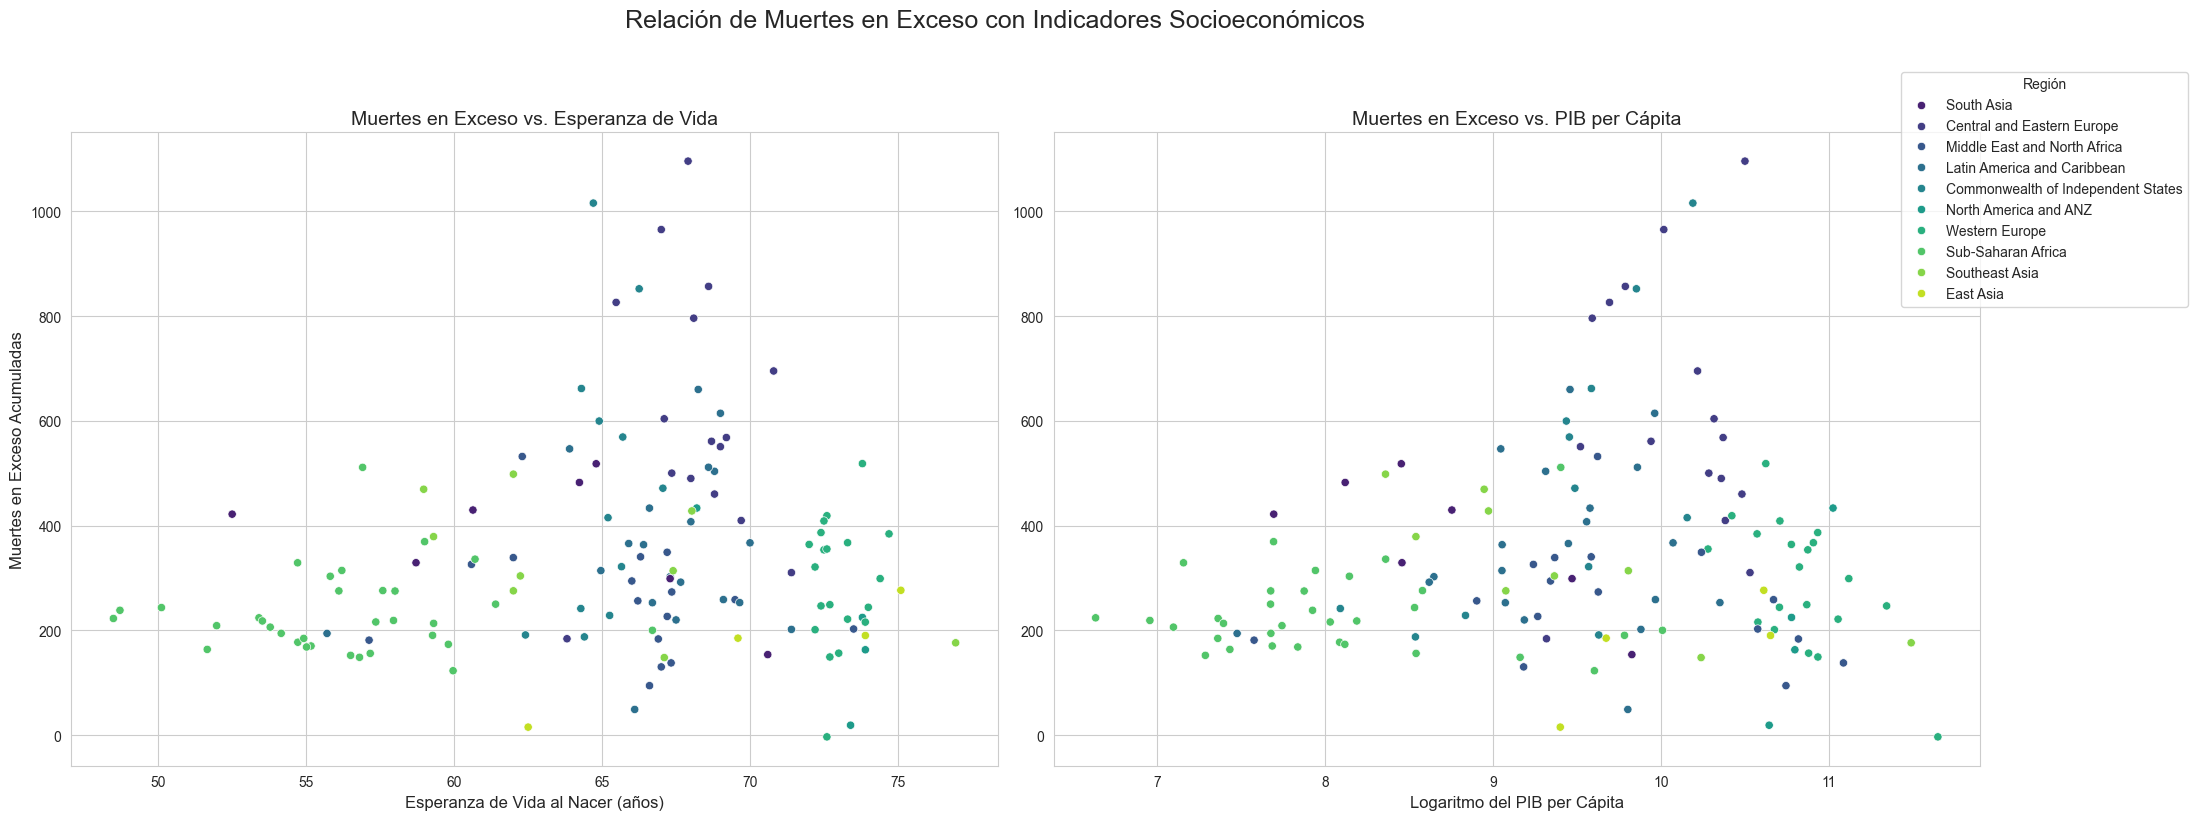

In [19]:
# Utilizo el mismo DataFrame 'df_snapshot' que contiene un valor por país

# Creo una figura con dos subplots, uno al lado del otro
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
fig.suptitle('Relación de Muertes en Exceso con Indicadores Socioeconómicos', fontsize=18, y=1.02)

# Gráfico 1: Muertes en Exceso vs. Esperanza de Vida
sns.scatterplot(
    data=df_snapshot,
    x='Healthy life expectancy',
    y='Cumulative excess deaths per 100,000 people (central estimate)',
    hue='Regional indicator', # Uso el color para diferenciar por región
    palette='viridis',
    ax=axes[0]
)
axes[0].set_title('Muertes en Exceso vs. Esperanza de Vida', fontsize=14)
axes[0].set_xlabel('Esperanza de Vida al Nacer (años)', fontsize=12)
axes[0].set_ylabel('Muertes en Exceso Acumuladas', fontsize=12)
axes[0].legend().set_visible(False) # Oculto la leyenda aquí para no sobrecargar

# Gráfico 2: Muertes en Exceso vs. PIB per Cápita
sns.scatterplot(
    data=df_snapshot,
    x='Logged GDP per capita',
    y='Cumulative excess deaths per 100,000 people (central estimate)',
    hue='Regional indicator',
    palette='viridis',
    ax=axes[1]
)
axes[1].set_title('Muertes en Exceso vs. PIB per Cápita', fontsize=14)
axes[1].set_xlabel('Logaritmo del PIB per Cápita', fontsize=12)
axes[1].set_ylabel('') # Quito la etiqueta Y para no ser redundante

# Muevo la leyenda a una posición común fuera de los gráficos
handles, labels = axes[1].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.1, 0.95), title='Región')
axes[1].legend().set_visible(False)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### Análisis de la Variable Específica Generosity

Al revisar las distribuciones y las estadísticas descriptivas, he notado un detalle interesante en la columna Generosity: contiene valores negativos. Tras investigar la documentación del *World Happiness Report*, he descubierto que la variable Generosity no es una simple medida de donaciones, sino el residuo de una regresión que compara las donaciones de un país con lo que se esperaría en función de su PIB per cápita.

Por lo tanto, un valor negativo no es un error. Significa que la generosidad de un país es menor de lo que se predeciría para su nivel de riqueza. Un valor positivo significa que es más generoso de lo esperado.

Para entenderlo mejor, voy a visualizar los 10 países con los valores más altos y más bajos de `Generosity`.


C:\Users\Usuario\AppData\Local\Temp\ipykernel_59980\3750594004.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Usuario\AppData\Local\Temp\ipykernel_59980\3750594004.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


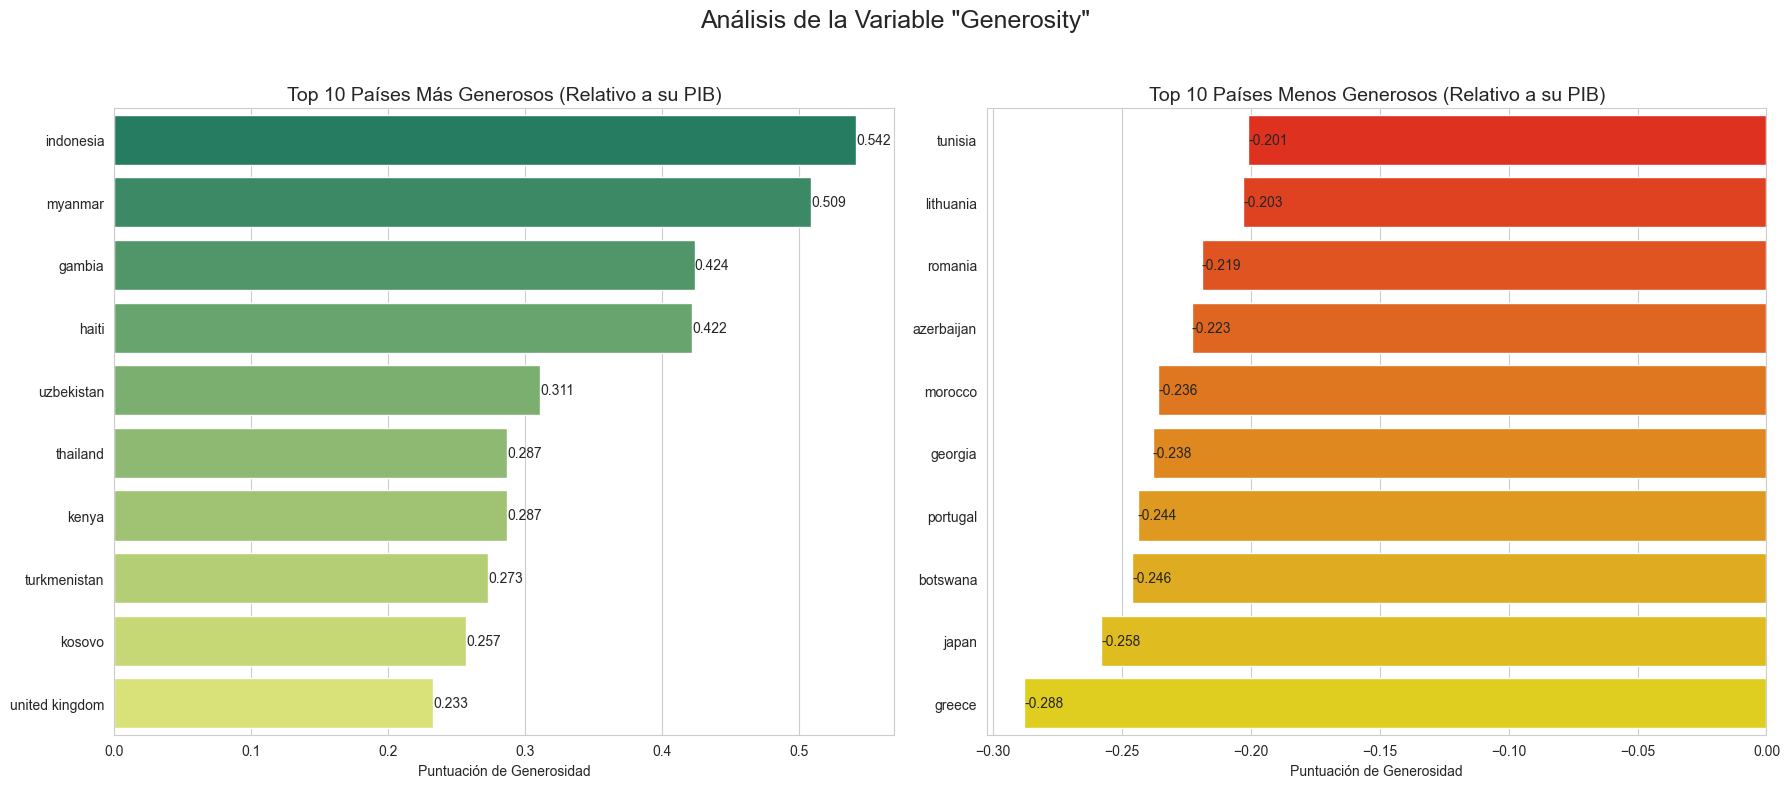

In [20]:
# Uso el df_snapshot que tiene un valor único por país
df_generosidad = df_snapshot.sort_values(by='Generosity', ascending=False)

# Creo una figura con dos subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
fig.suptitle('Análisis de la Variable "Generosity"', fontsize=18)

# Gráfico 1: Top 10 Países Más "Generosos" (por encima de lo esperado)
sns.barplot(
    x=df_generosidad.head(10)['Generosity'],
    y=df_generosidad.head(10)['Country name'],
    palette='summer',
    ax=axes[0]
)
axes[0].set_title('Top 10 Países Más Generosos (Relativo a su PIB)', fontsize=14)
axes[0].set_xlabel('Puntuación de Generosidad')
axes[0].set_ylabel('')

# Gráfico 2: Top 10 Países Menos "Generosos" (por debajo de lo esperado)
sns.barplot(
    x=df_generosidad.tail(10)['Generosity'],
    y=df_generosidad.tail(10)['Country name'],
    palette='autumn',
    ax=axes[1]
)
axes[1].set_title('Top 10 Países Menos Generosos (Relativo a su PIB)', fontsize=14)
axes[1].set_xlabel('Puntuación de Generosidad')
axes[1].set_ylabel('')

# Añado las anotaciones a ambos gráficos
for ax in axes:
    for p in ax.patches:
        width = p.get_width()
        ax.text(
            width,
            p.get_y() + p.get_height() / 2,
            f'{width:.3f}',
            va='center'
        )

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


### Creación de una Función Reutilizable para Visualización

Para mejorar la estructura de mi código y hacerlo más eficiente, voy a agrupar pasos repetidos en una función.

Voy a crear una función llamada analizar_impacto_por_categoria. Esta función tomará el DataFrame y el nombre de una columna categórica, y generará automáticamente un gráfico de barras ordenado y anotado, mostrando el impacto medio de las muertes en exceso para cada categoría. Para probarla, la usaré para recrear el gráfico de impacto por región que hice anteriormente.


--- Análisis de Impacto por: Regional indicator ---


C:\Users\Usuario\AppData\Local\Temp\ipykernel_59980\2567856040.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


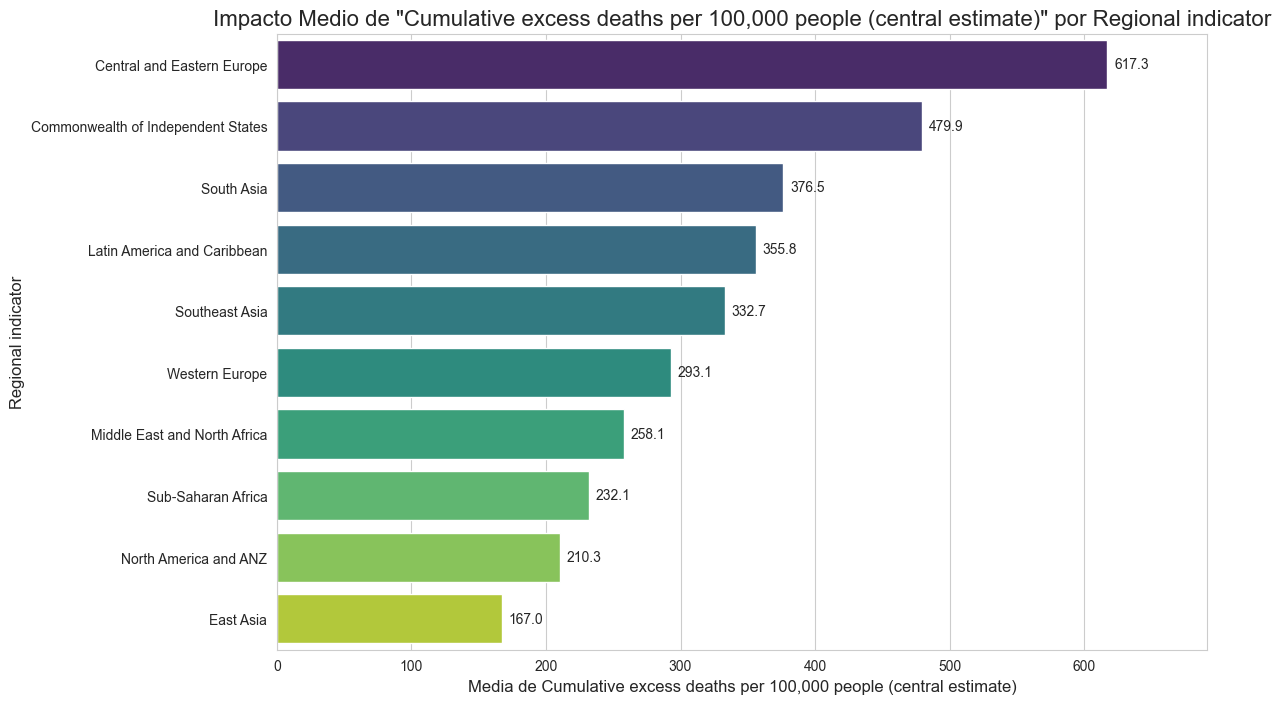

In [21]:
def analizar_impacto_por_categoria(dataframe, columna_categorica, metrica, paleta_colores='viridis'):
    """
    Calcula el impacto medio de una métrica agrupando por una columna categórica
    y genera un gráfico de barras ordenado y anotado.

    Args:
        dataframe (pd.DataFrame): El DataFrame a analizar (debe tener un valor por país).
        columna_categorica (str): El nombre de la columna por la que agrupar (ej. 'Regional indicator').
        metrica (str): El nombre de la columna numérica a promediar (ej. 'Cumulative excess deaths...').
        paleta_colores (str): La paleta de colores a usar para el gráfico.
    """
    print(f"--- Análisis de Impacto por: {columna_categorica} ---")

    # Agrupo, calculo la media y ordeno
    impacto_agrupado = dataframe.groupby(columna_categorica).agg({metrica: 'mean'})
    impacto_ordenado = impacto_agrupado.sort_values(by=metrica, ascending=False)

    # Visualización
    plt.figure(figsize=(12, 8))
    barplot = sns.barplot(
        x=impacto_ordenado[metrica],
        y=impacto_ordenado.index,
        palette=paleta_colores
    )

    # Anotaciones
    for p in barplot.patches:
        width = p.get_width()
        plt.text(width + 5, p.get_y() + p.get_height() / 2, f'{width:.1f}', va='center')

    # Títulos y etiquetas
    plt.title(f'Impacto Medio de "{metrica}" por {columna_categorica}', fontsize=16)
    plt.xlabel(f'Media de {metrica}', fontsize=12)
    plt.ylabel(columna_categorica, fontsize=12)
    plt.xlim(0, impacto_ordenado[metrica].max() * 1.12) # Margen para etiquetas
    plt.show()


# Prueba 
# La llamo para analizar el impacto por 'Regional indicator' usando nuestro df_snapshot
metrica_muertes = 'Cumulative excess deaths per 100,000 people (central estimate)'
analizar_impacto_por_categoria(df_snapshot, 'Regional indicator', metrica_muertes)


### analizar_impacto_por_categoria

Voy a crear una visualización final que resuma de forma clara y directa qué países han sido los más y los menos afectados por la pandemia, según la métrica de muertes en exceso. Estos rankings son insights muy valiosos y fáciles de comunicar en el informe final. Para generar estos gráficos, reutilizaré la función analizar_impacto_por_categoria que definí en el paso anterior.


--- Análisis de Impacto por: Country name ---


C:\Users\Usuario\AppData\Local\Temp\ipykernel_59980\2567856040.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


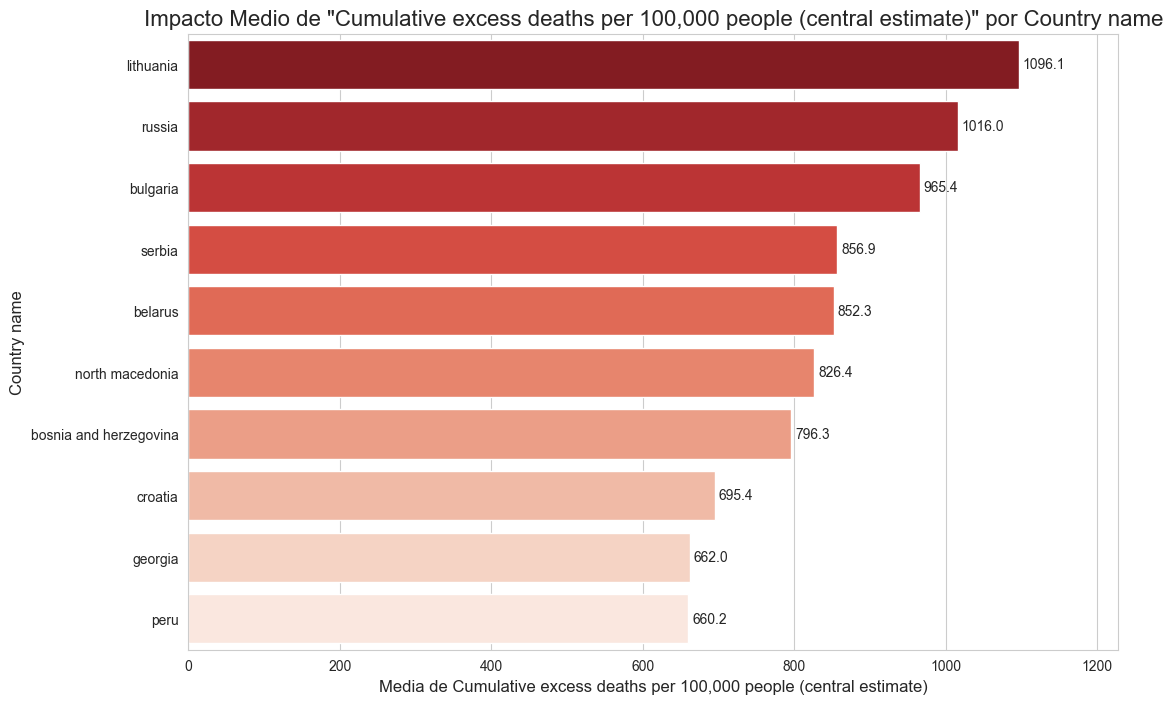

--- Análisis de Impacto por: Country name ---


C:\Users\Usuario\AppData\Local\Temp\ipykernel_59980\2567856040.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


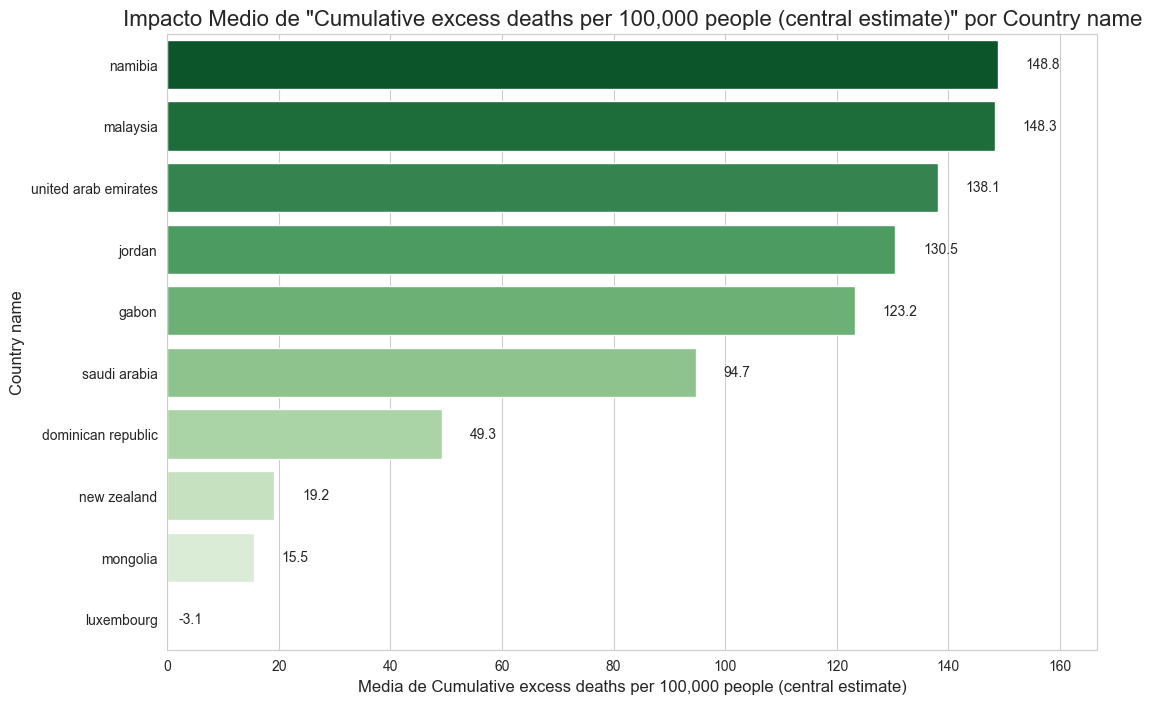

In [22]:
# Ranking de los 10 países MÁS afectados
# Selecciono los 10 países con el mayor número de muertes en exceso acumuladas
top_10_afectados = df_snapshot.sort_values(by=metrica_muertes, ascending=False).head(10)

# Utilizo mi función reutilizable para visualizar el top 10
analizar_impacto_por_categoria(
    dataframe=top_10_afectados,
    columna_categorica='Country name',
    metrica=metrica_muertes,
    paleta_colores='Reds_r' # Uso una paleta de rojos para denotar impacto negativo
)


# Ranking de los 10 países MENOS afectados
# Selecciono los 10 países con el menor número de muertes en exceso (pueden ser incluso negativas)
top_10_menos_afectados = df_snapshot.sort_values(by=metrica_muertes, ascending=True).head(10)

# Utilizo la misma función para visualizar el bottom 10
analizar_impacto_por_categoria(
    dataframe=top_10_menos_afectados,
    columna_categorica='Country name',
    metrica=metrica_muertes,
    paleta_colores='Greens_r' # Uso una paleta de verdes para denotar bajo impacto
)


### Comparativa de la Evolución Temporal por Región
Procedo a comparar la evolución temporal entre las diferentes regiones geográficas, para comprender las diferencias temporales en las diferntes regiones respecto a las olas de la pandemia, su intensidad y la forma en la que las muertes van o no descendiendo.

Esta visualización es clave para entender que la pandemia no fue un evento monolítico, sino que tuvo dinámicas muy diferentes según la zona del mundo.

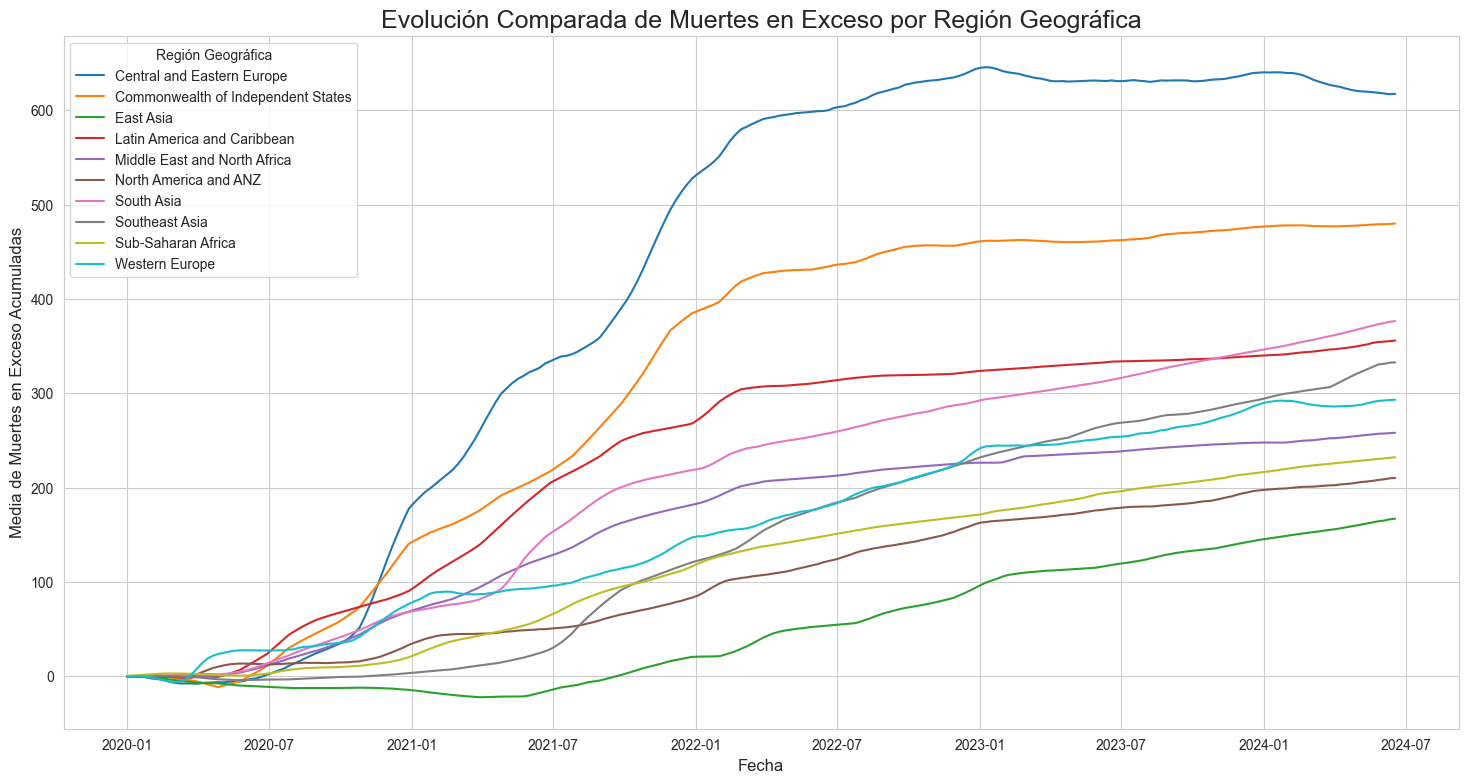

In [23]:
# Preparo los datos, agrupando por día y por región, y calculando la media de muertes
evolucion_por_region = df_final_limpio.groupby(['Day', 'Regional indicator']).agg({
    'Cumulative excess deaths per 100,000 people (central estimate)': 'mean'
}).reset_index()

# Creo la visualización
plt.figure(figsize=(18, 9))

# El parámetro 'hue' es la clave aquí: le dice a Seaborn que dibuje una línea diferente para cada categoría de 'Regional indicator'
sns.lineplot(
    data=evolucion_por_region,
    x='Day',
    y='Cumulative excess deaths per 100,000 people (central estimate)',
    hue='Regional indicator',
    palette='tab10' # Una paleta con colores bien diferenciados
)

# Añado títulos y etiquetas
plt.title('Evolución Comparada de Muertes en Exceso por Región Geográfica', fontsize=18)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Media de Muertes en Exceso Acumuladas', fontsize=12)
plt.legend(title='Región Geográfica')
plt.show()


### Análisis de Cuadrantes (Salud vs. Corrupción)

Para identificar patrones más complejos, voy a realizar un análisis de cuadrantes. Esta técnica me permite segmentar los países de forma manual basándome en dos variables clave simultáneamente.

He elegido dos indicadores muy potentes: Healthy life expectancy (un proxy de la salud general de la población) y Perceptions of corruption (un proxy de la fortaleza institucional). Mi objetivo es dividir a los países en cuatro grupos:
1.  **Cuadrante 1:** Alta esperanza de vida y Baja corrupción (el "ideal").
2.  **Cuadrante 2:** Alta esperanza de vida y Alta corrupción.
3.  **Cuadrante 3:** Baja esperanza de vida y Baja corrupción.
4.  **Cuadrante 4:** Baja esperanza de vida y Alta corrupción.

Tras segmentarlos, analizaré si los países en el cuadrante "ideal" gestionaron la pandemia mejor (menos muertes en exceso) que los del cuadrante opuesto. Para ello, reutilizaré la función analizar_impacto_por_categoria que ya construí.


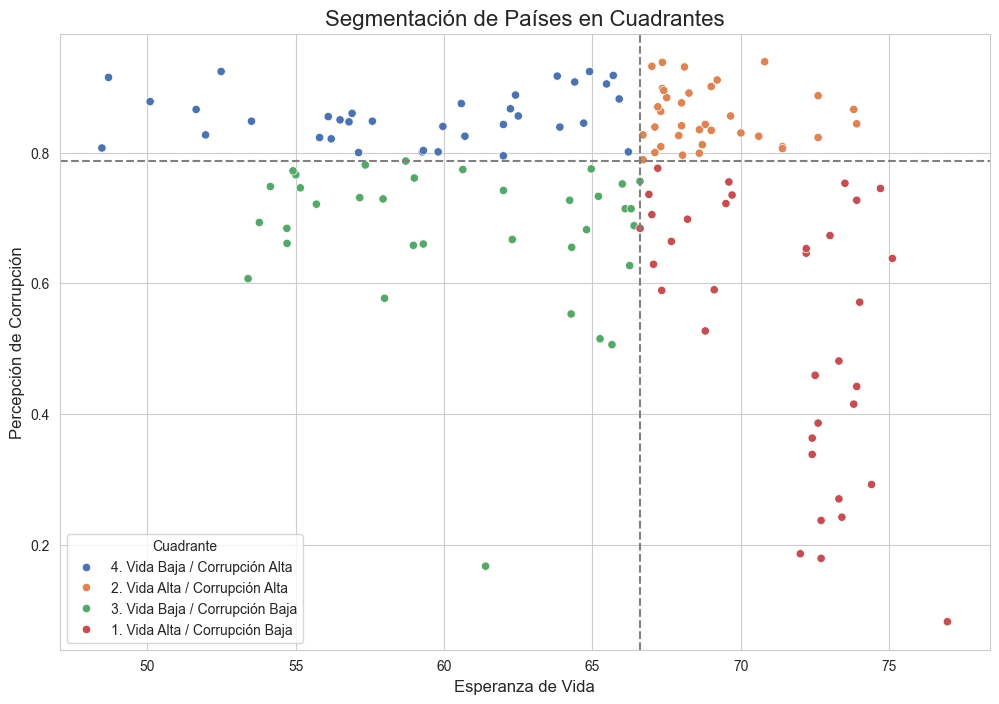

--- Análisis de Impacto por: Cuadrante ---


C:\Users\Usuario\AppData\Local\Temp\ipykernel_59980\2567856040.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


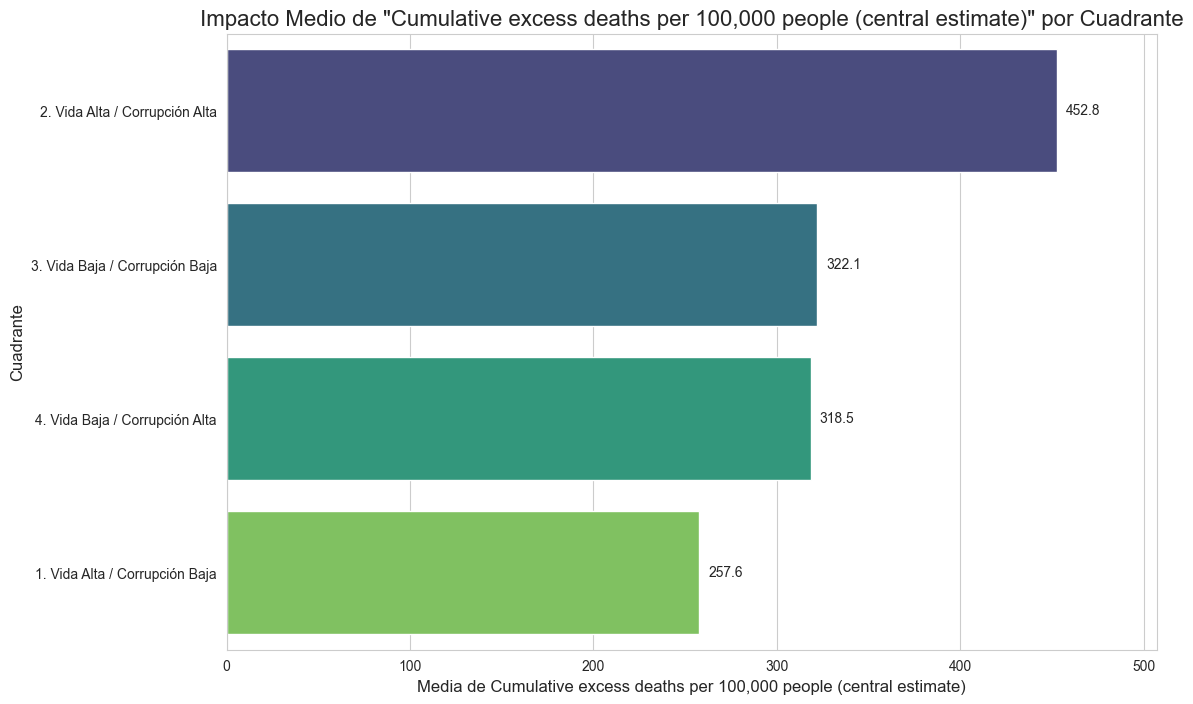

In [24]:
# Calculo las medianas, que usaré como líneas divisorias para los cuadrantes
mediana_vida = df_snapshot['Healthy life expectancy'].median()
mediana_corrupcion = df_snapshot['Perceptions of corruption'].median()

# Defino una función para asignar cada país a un cuadrante
def asignar_cuadrante(row):
    vida_alta = row['Healthy life expectancy'] >= mediana_vida
    corrupcion_baja = row['Perceptions of corruption'] <= mediana_corrupcion # Menos corrupción es mejor

    if vida_alta and corrupcion_baja:
        return '1. Vida Alta / Corrupción Baja'
    elif vida_alta and not corrupcion_baja:
        return '2. Vida Alta / Corrupción Alta'
    elif not vida_alta and corrupcion_baja:
        return '3. Vida Baja / Corrupción Baja'
    else:
        return '4. Vida Baja / Corrupción Alta'

# Aplico la función para crear la nueva columna 'Cuadrante'
df_snapshot['Cuadrante'] = df_snapshot.apply(asignar_cuadrante, axis=1)


# Visualización de los Cuadrantes
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df_snapshot,
    x='Healthy life expectancy',
    y='Perceptions of corruption',
    hue='Cuadrante',
    palette='deep'
)
# Dibujo las líneas de las medianas
plt.axvline(mediana_vida, color='grey', linestyle='--')
plt.axhline(mediana_corrupcion, color='grey', linestyle='--')
plt.title('Segmentación de Países en Cuadrantes', fontsize=16)
plt.xlabel('Esperanza de Vida', fontsize=12)
plt.ylabel('Percepción de Corrupción', fontsize=12)
plt.show()


# Análisis del Impacto por Cuadrante
# Reutilizo mi función para ver el resultado
analizar_impacto_por_categoria(
    dataframe=df_snapshot,
    columna_categorica='Cuadrante',
    metrica=metrica_muertes,
    paleta_colores='viridis'
)


## Casos Atípicos y Dinámicas

En los gráficos de dispersión, he observado que algunos países se desvían significativamente de la tendencia general. Estos casos atípicos son extremadamente valiosos, ya que pueden revelar estrategias exitosas o factores de riesgo que no son visibles en el análisis agregado.

Mi objetivo ahora es identificar de forma sistemática a los países que tuvieron un resultado mucho mejor o peor de lo que se esperaría según su nivel de riqueza (PIB). Para ello:
Crearé un modelo de regresión lineal simple que establezca la "tendencia esperada" de muertes en función del PIB.
Calcularé la diferencia (el "residuo") entre el valor real de muertes de un país y su valor esperado.
Un residuo muy positivo significará que el país tuvo muchas más muertes de las esperadas (un "underperformer"). Un residuo muy negativo, que tuvo muchas menos (un "overperformer").


In [29]:
from sklearn.linear_model import LinearRegression 

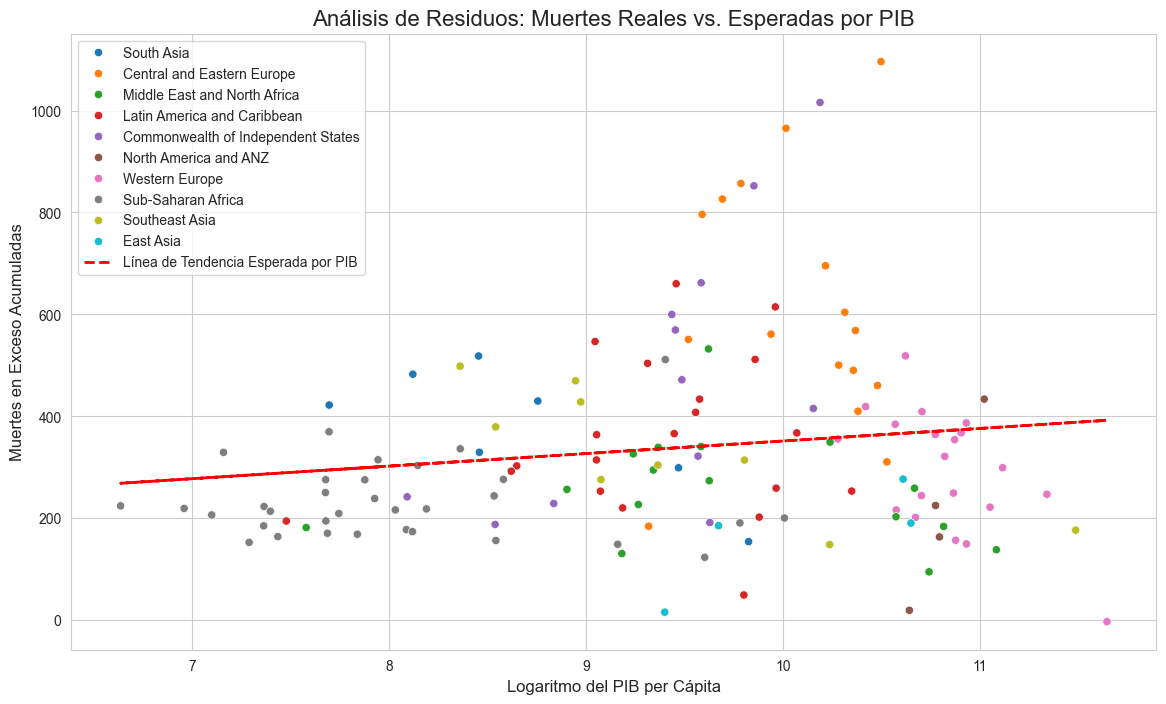

--- Top 5 Países con MÁS muertes de las esperadas por su PIB ---
       Country name  Logged GDP per capita  \
153241    lithuania                 10.499   
224505       russia                 10.189   
35865      bulgaria                 10.016   
232889       serbia                  9.787   
21193       belarus                  9.853   

        Cumulative excess deaths per 100,000 people (central estimate)  \
153241                                          1096.0930                
224505                                          1015.9762                
35865                                            965.4326                
232889                                           856.9464                
21193                                            852.3417                

           Residuo  
153241  732.316833  
224505  659.838271  
35865   613.557300  
232889  510.713541  
21193   504.482635  

--- Top 5 Países con MENOS muertes de las esperadas por su PIB ---
              Count

In [30]:
# Preparo los datos para el modelo de regresión
# Uso el df_snapshot que tiene un valor por país
X = df_snapshot[['Logged GDP per capita']]
y = df_snapshot[metrica_muertes]

# Creo y entreno el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X, y)

# Calculo las muertes "esperadas" según el PIB de cada país
predicciones = modelo.predict(X)

# Calculo el residuo (la diferencia entre lo real y lo esperado)
df_snapshot['Residuo'] = y - predicciones

# Visualizo la línea de regresión y los puntos
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df_snapshot, x='Logged GDP per capita', y=metrica_muertes, hue='Regional indicator')
plt.plot(X, predicciones, color='red', linestyle='--', linewidth=2, label='Línea de Tendencia Esperada por PIB')
plt.title('Análisis de Residuos: Muertes Reales vs. Esperadas por PIB', fontsize=16)
plt.xlabel('Logaritmo del PIB per Cápita', fontsize=12)
plt.ylabel('Muertes en Exceso Acumuladas', fontsize=12)
plt.legend()
plt.show()

# Rankings de Outliers
top_5_underperformers = df_snapshot.sort_values(by='Residuo', ascending=False).head(5)
top_5_overperformers = df_snapshot.sort_values(by='Residuo', ascending=True).head(5)

print("--- Top 5 Países con MÁS muertes de las esperadas por su PIB ---")
print(top_5_underperformers[['Country name', 'Logged GDP per capita', metrica_muertes, 'Residuo']])

print("\n--- Top 5 Países con MENOS muertes de las esperadas por su PIB ---")
print(top_5_overperformers[['Country name', 'Logged GDP per capita', metrica_muertes, 'Residuo']])


### Análisis de la Velocidad de Crecimiento de la Pandemia

Hasta ahora, he analizado principalmente las muertes acumuladas. Sin embargo, para entender la dinámica y la "explosividad" de las olas, es muy útil analizar la velocidad de crecimiento de las muertes en exceso. Un número acumulado alto puede deberse a una pandemia larga y sostenida, mientras que una velocidad de crecimiento alta indica olas muy agudas e intensas.

Voy a calcular una nueva métrica: el cambio diario en las muertes en exceso. Esto me permitirá identificar los días y los países que experimentaron los picos de crecimiento más drásticos. Luego, visualizaré los países que sufrieron las olas más intensas, medido por el pico máximo de crecimiento diario.


C:\Users\Usuario\AppData\Local\Temp\ipykernel_59980\3687049572.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot_picos = sns.barplot(


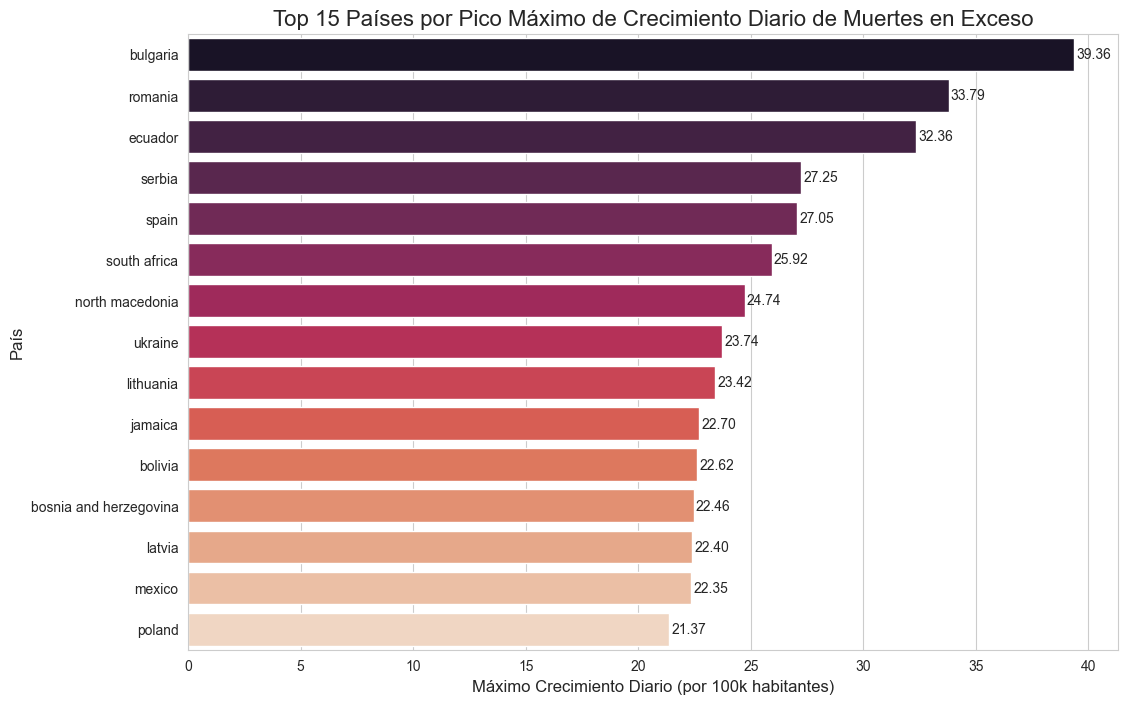

In [31]:
# Calculo el cambio diario en la métrica de muertes.
# Primero ordeno los datos por país y día para asegurar que el cálculo de la diferencia es correcto.
df_final_limpio_sorted = df_final_limpio.sort_values(by=['Country name', 'Day'])
df_final_limpio_sorted['Crecimiento Diario Muertes Exceso'] = df_final_limpio_sorted.groupby('Country name')[metrica_muertes].diff().fillna(0)

# Encuentro el pico máximo de crecimiento diario para cada país
picos_de_crecimiento = df_final_limpio_sorted.groupby('Country name')['Crecimiento Diario Muertes Exceso'].max().reset_index()

# Selecciono los 15 países con los picos más altos
top_15_picos = picos_de_crecimiento.sort_values(by='Crecimiento Diario Muertes Exceso', ascending=False).head(15)

# Visualizo los resultados
plt.figure(figsize=(12, 8))
barplot_picos = sns.barplot(
    data=top_15_picos,
    x='Crecimiento Diario Muertes Exceso',
    y='Country name',
    palette='rocket'
)

# Anoto el gráfico
for p in barplot_picos.patches:
    width = p.get_width()
    plt.text(width + 0.1, p.get_y() + p.get_height() / 2, f'{width:.2f}', va='center')

plt.title('Top 15 Países por Pico Máximo de Crecimiento Diario de Muertes en Exceso', fontsize=16)
plt.xlabel('Máximo Crecimiento Diario (por 100k habitantes)', fontsize=12)
plt.ylabel('País', fontsize=12)
plt.show()
